<a href="https://colab.research.google.com/github/maxsohl/GSB530_Covid/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#install.packages('factoextra')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘later’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘Rcpp’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’




In [1]:
library(tidyverse)  # data manipulation
library(ggplot2)
library(cluster)    # clustering algorithms
library(factoextra)
library(readr)
library(readxl)
library(cluster)


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



# **Full Dataset**

In [2]:
df = read_excel("COVID_TESTING_DATASET.xlsx")

In [3]:
# Clean data
df = na.omit(df)
df$Age_60_And_Above <- ifelse(df$Age_60_And_Above == "Yes", 1, 0)
df$Male <- ifelse(df$Sex == "male", 1, 0)
df$Positive <- ifelse(df$Result == "positive", 1, 0)
df = subset(df, select = -c(Sex,Result) )

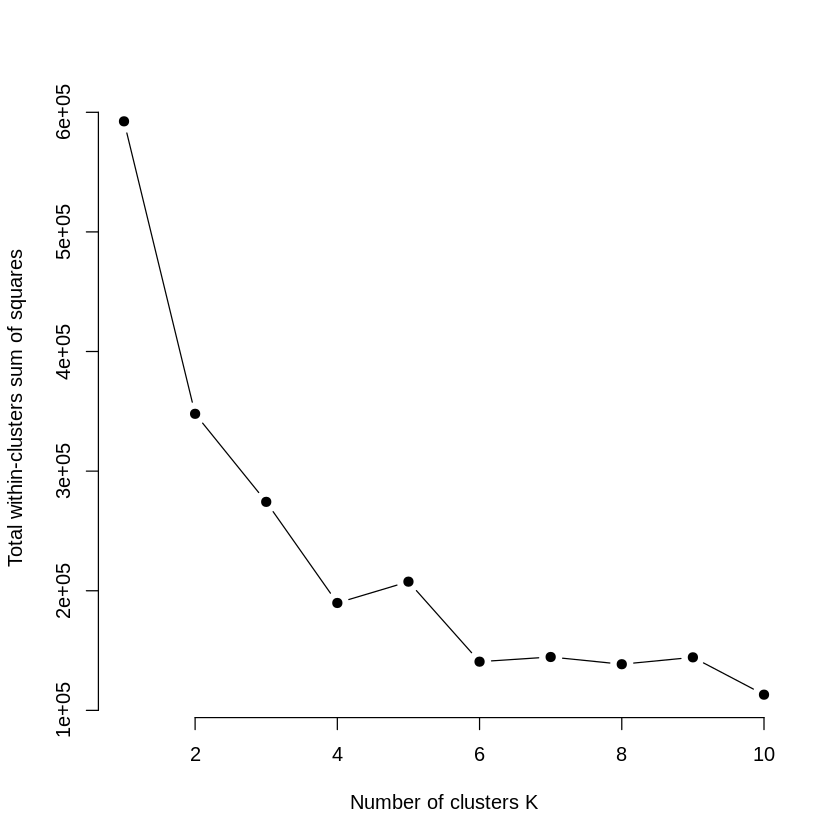

In [4]:
set.seed(123)

# function to compute total within-cluster sum of square 
wss <- function(k) {
  kmeans(df, k, nstart = 10)$tot.withinss
}

# Compute and plot wss for k = 1 to k = 15
k.values <- 1:10

# extract wss for 2-15 clusters
wss_values <- map_dbl(k.values, wss)

plot(k.values, wss_values,
       type="b", pch = 19, frame = FALSE, 
       xlab="Number of clusters K",
       ylab="Total within-clusters sum of squares")

In [5]:
km <- kmeans(df, centers = 2, nstart = 25)
km

K-means clustering with 2 clusters of sizes 476135, 502358

Cluster means:
       Cough      Fever Sore_Throat Shortness_Of_Breath   Headache
1 0.02676132 0.03028133 0.007783507         0.002404780 0.01786468
2 0.02834831 0.02570080 0.010729400         0.003173036 0.02121794
  Age_60_And_Above    Contact Male   Positive
1        0.1326536 0.06386214    1 0.11323049
2        0.1338348 0.06604055    0 0.09777688

Clustering vector:
    [1] 2 2 2 1 2 2 2 1 2 1 2 1 1 2 1 1 2 2 1 2 2 2 2 2 2 1 2 2 2 1 1 1 2 2 2 1
   [37] 2 1 2 2 2 2 2 2 1 2 1 1 1 1 2 2 1 1 2 1 1 1 2 1 1 2 1 2 2 1 1 1 1 2 1 1
   [73] 2 2 2 2 1 2 2 2 1 2 2 2 1 1 1 1 1 2 2 2 2 2 1 1 1 1 2 2 2 2 2 1 2 1 2 1
  [109] 2 2 1 1 1 1 1 2 2 1 1 2 1 2 2 2 2 1 1 1 2 2 1 2 2 1 1 2 2 1 2 2 2 1 2 1
  [145] 2 2 1 2 2 1 2 1 1 1 2 1 2 2 2 2 2 2 1 1 2 2 1 1 1 2 2 2 2 2 1 2 1 2 2 1
  [181] 2 1 2 2 1 2 1 1 2 2 2 1 1 1 2 1 1 2 2 2 1 2 2 2 1 1 2 2 1 2 1 2 2 2 1 1
  [217] 1 1 1 1 2 1 1 1 2 2 2 1 1 2 1 2 2 1 1 2 2 1 1 2 1 2 1 2 2 1 1 1 1 2 1 2
  [253

# **Male Subset:**

In [7]:
males = df[df$Male == 1,]

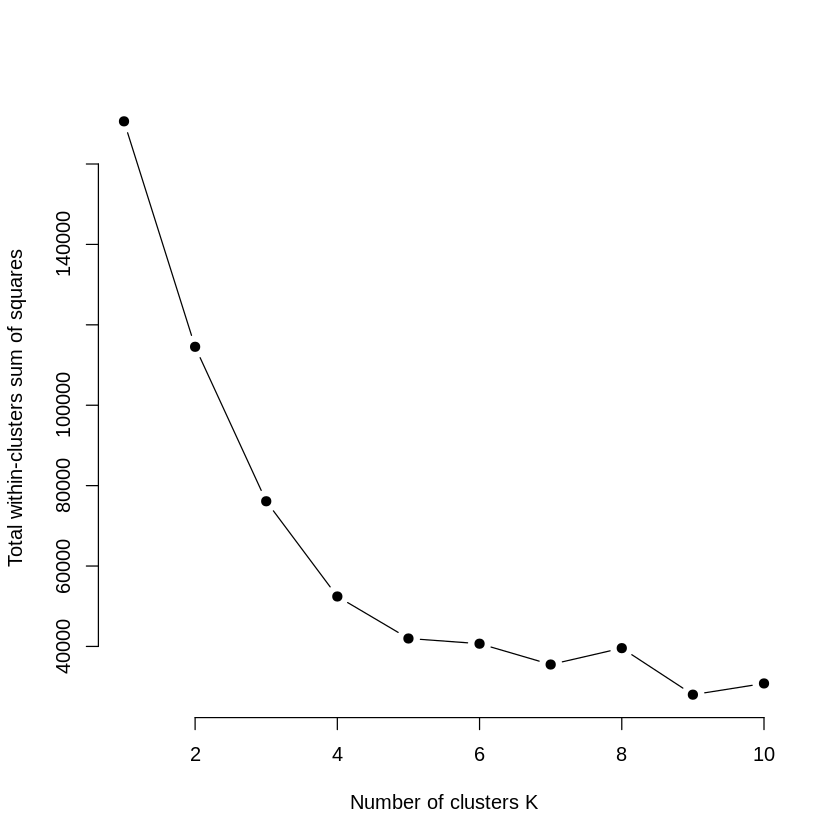

In [8]:
# Elbow method to find best k value
set.seed(123)

# function to compute total within-cluster sum of square 
wss <- function(k) {
  kmeans(males, k, nstart = 10 )$tot.withinss
}

# Compute and plot wss for k = 1 to k = 15
k_values <- 1:10

# extract wss for 2-15 clusters
wss_values <- map_dbl(k_values, wss)

plot(k_values, wss_values,
       type="b", pch = 19, frame = FALSE, 
       xlab="Number of clusters K",
       ylab="Total within-clusters sum of squares")

In [9]:
km <- kmeans(males, centers = 4, nstart = 25)
km

K-means clustering with 4 clusters of sizes 56073, 363776, 20963, 35323

Cluster means:
        Cough       Fever  Sore_Throat Shortness_Of_Breath     Headache
1 0.006830382 0.004939989 0.0003031762        0.0004815152 0.0005885185
2 0.009580071 0.007782262 0.0005222994        0.0001841793 0.0007834492
3 0.239898869 0.284930592 0.0919715690        0.0244716882 0.2236321137
4 0.108852589 0.151091357 0.0444752711        0.0152308694 0.0990855816
  Age_60_And_Above    Contact Male  Positive
1       1.00000000 0.01580083    1 0.0000000
2       0.00000000 0.02352547    1 0.0000000
3       0.08882316 1.00000000    1 0.8868006
4       0.14794893 0.00000000    1 1.0000000

Clustering vector:
    [1] 2 3 2 1 2 1 2 2 2 2 2 2 1 2 3 4 2 2 1 2 2 3 2 2 2 3 4 1 2 2 2 2 2 2 1 3
   [37] 1 4 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 3 2 2 1 2 1 2 1 2 3 2 2 3
   [73] 2 2 1 1 2 2 2 2 2 2 1 1 1 1 2 2 1 1 2 2 2 4 1 2 2 1 2 2 2 2 2 1 2 2 2 2
  [109] 1 2 2 1 2 2 2 2 4 1 2 3 3 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2

# **Females:**

In [10]:
females = df[df$Male == 0,]

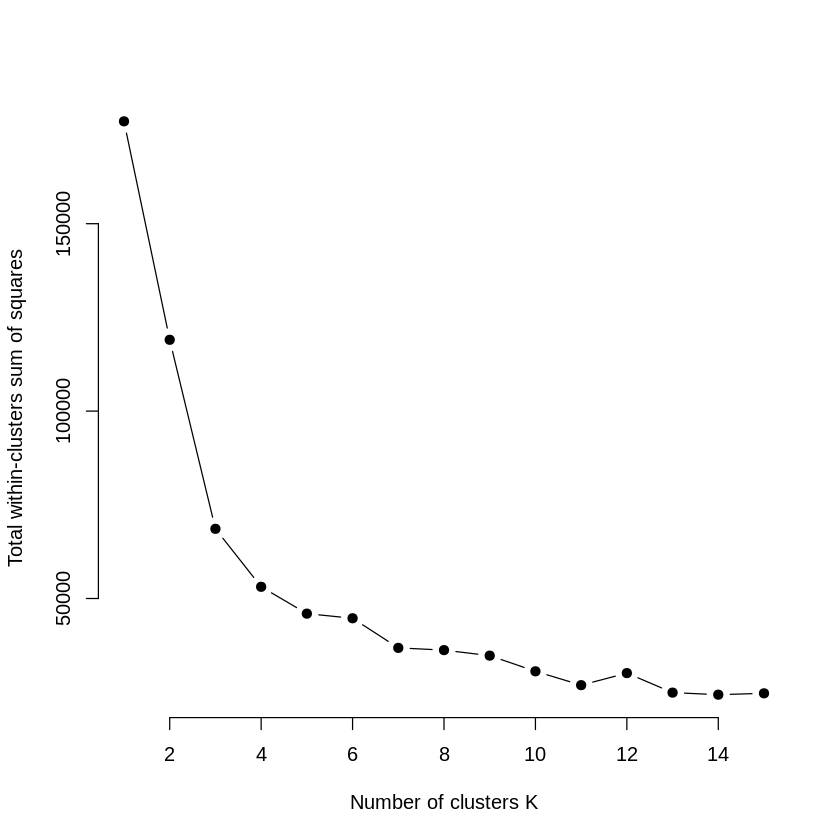

In [11]:
# Elbow method to find best k value
set.seed(123)

# function to compute total within-cluster sum of square 
wss <- function(k) {
  kmeans(females, k, nstart = 10 )$tot.withinss
}

# Compute and plot wss for k = 1 to k = 15
k_values <- 1:15

# extract wss for 2-15 clusters
wss_values <- map_dbl(k_values, wss)

plot(k_values, wss_values,
       type="b", pch = 19, frame = FALSE, 
       xlab="Number of clusters K",
       ylab="Total within-clusters sum of squares")

In [12]:
km <- kmeans(females, centers = 4, nstart = 25)
km

K-means clustering with 4 clusters of sizes 28788, 388907, 23540, 61123

Cluster means:
        Cough       Fever  Sore_Throat Shortness_Of_Breath     Headache
1 0.119563707 0.129081562 0.0619355287        0.0229956926 0.1260594692
2 0.010228666 0.006916821 0.0005348322        0.0001799916 0.0008613885
3 0.268649108 0.261639762 0.1427357689        0.0353016143 0.2827527613
4 0.008131145 0.005660717 0.0006380577        0.0005071741 0.0006380577
  Age_60_And_Above    Contact Male  Positive
1       0.14002362 0.00000000    0 1.0000000
2       0.00000000 0.02255552    0 0.0000000
3       0.08831776 1.00000000    0 0.8636788
4       1.00000000 0.01413543    0 0.0000000

Clustering vector:
    [1] 2 2 2 2 4 3 4 2 2 2 2 2 1 2 2 2 2 3 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 4 2
   [37] 2 2 2 4 4 1 4 2 4 2 2 4 2 1 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 3 2 4 2 2 1
   [73] 2 2 2 2 2 2 2 2 2 3 4 4 4 4 2 2 2 2 2 1 2 2 2 2 2 4 2 2 4 2 2 2 2 2 2 2
  [109] 2 2 2 2 2 4 2 2 2 4 2 2 2 2 2 2 2 2 2 4 4 2 2 2 2 3 1 2 4 2

# **Old:**

In [13]:
old = df[df$Age_60_And_Above == 1,]

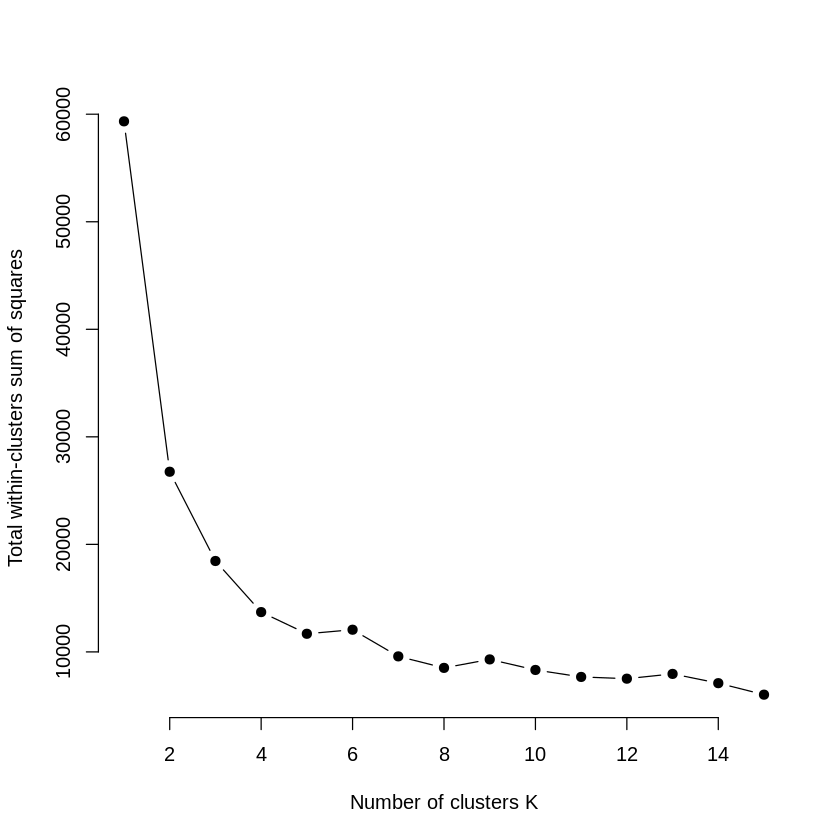

In [14]:
# Elbow method to find best k value
set.seed(123)

# function to compute total within-cluster sum of square 
wss <- function(k) {
  kmeans(old, k, nstart = 10 )$tot.withinss
}

# Compute and plot wss for k = 1 to k = 15
k_values <- 1:15

# extract wss for 2-15 clusters
wss_values <- map_dbl(k_values, wss)

plot(k_values, wss_values,
       type="b", pch = 19, frame = FALSE, 
       xlab="Number of clusters K",
       ylab="Total within-clusters sum of squares")

In [15]:
km = kmeans(old, centers = 3, nstart = 25)
km

K-means clustering with 3 clusters of sizes 13076, 56132, 61186

Cluster means:
       Cough       Fever  Sore_Throat Shortness_Of_Breath     Headache
1 0.19203120 0.204726216 0.0566687060        0.0325787703 0.1125726522
2 0.00767833 0.005772109 0.0003563030        0.0005700848 0.0009976484
3 0.00892361 0.006406694 0.0008825548        0.0006537443 0.0010459909
  Age_60_And_Above    Contact      Male Positive
1                1 0.29206179 0.5375497 0.998547
2                1 0.01683532 1.0000000 0.000000
3                1 0.01515052 0.0000000 0.000000

Clustering vector:
    [1] 3 3 2 2 1 2 2 3 1 2 3 3 3 3 2 3 1 2 3 2 3 2 2 3 3 3 2 3 2 3 2 3 2 2 2 2
   [37] 3 2 2 3 2 2 2 3 3 2 2 3 2 3 1 3 3 2 3 2 1 2 2 3 2 2 2 2 3 3 2 2 2 2 3 3
   [73] 2 3 2 2 1 2 3 3 3 2 2 2 3 2 2 2 2 2 2 1 2 3 3 2 3 3 3 3 2 3 2 2 3 1 2 3
  [109] 3 3 3 2 2 3 2 3 3 1 3 3 3 2 2 2 3 1 3 1 3 1 3 2 3 3 2 2 3 3 3 2 2 1 3 3
  [145] 2 2 3 2 2 2 3 3 3 2 1 2 2 1 3 2 2 1 3 3 2 2 2 3 3 2 3 3 2 3 2 2 3 2 3 3
  [181] 3 2 1 2 2 2 

# **Young**

In [16]:
young = df[df$Age_60_And_Above == 0,]

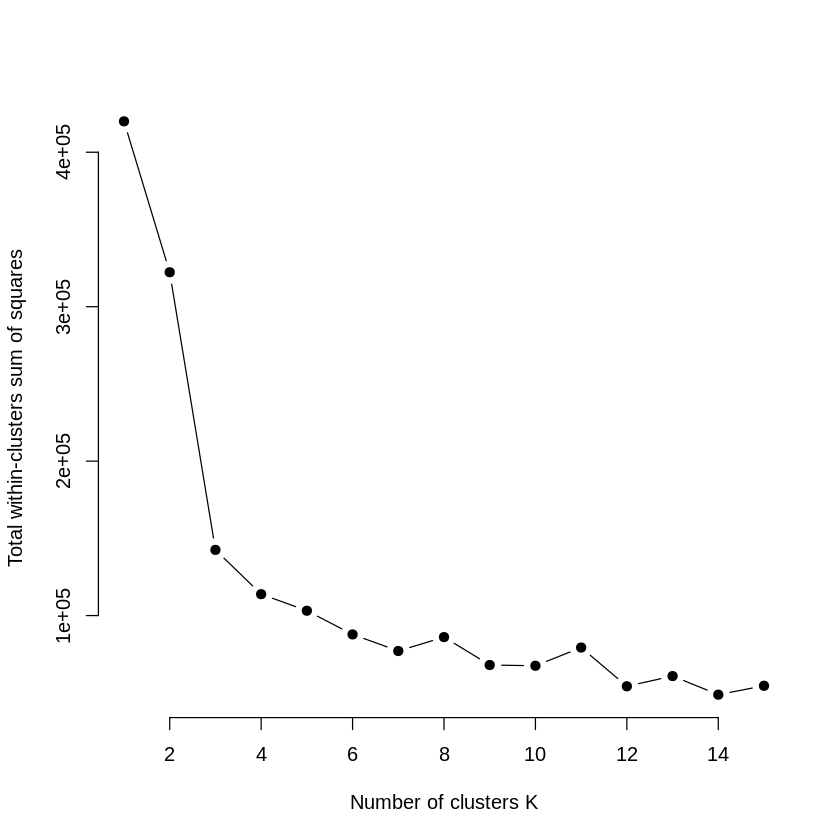

In [17]:
# Elbow method to find best k value
set.seed(123)

# function to compute total within-cluster sum of square 
wss <- function(k) {
  kmeans(young, k, nstart = 10 )$tot.withinss
}

# Compute and plot wss for k = 1 to k = 15
k_values <- 1:15

# extract wss for 2-15 clusters
wss_values <- map_dbl(k_values, wss)

plot(k_values, wss_values,
       type="b", pch = 19, frame = FALSE, 
       xlab="Number of clusters K",
       ylab="Total within-clusters sum of squares")

In [18]:
km = kmeans(young, 3, nstart = 25)
km

K-means clustering with 3 clusters of sizes 365907, 90364, 391828

Cluster means:
       Cough       Fever Sore_Throat Shortness_Of_Breath    Headache
1 0.01240479 0.010376954 0.001002987        0.0003306851 0.002320262
2 0.15013722 0.180459032 0.079843743        0.0215683237 0.170521447
3 0.01375348 0.009779801 0.001783946        0.0004364160 0.003356064
  Age_60_And_Above    Contact      Male  Positive
1                0 0.02921234 1.0000000 0.0000000
2                0 0.39296623 0.5208601 0.9956952
3                0 0.02984218 0.0000000 0.0000000

Clustering vector:
    [1] 3 3 3 1 3 2 2 1 3 1 3 1 3 3 1 3 2 3 3 3 3 1 2 3 1 1 1 3 2 3 3 1 3 3 3 3
   [37] 3 3 2 3 2 1 1 3 3 1 1 3 2 1 1 1 2 3 3 3 1 1 1 3 1 1 2 1 3 3 3 3 2 1 1 2
   [73] 3 3 3 1 1 1 1 3 3 3 3 3 1 3 1 3 1 3 3 1 1 1 1 3 3 1 1 3 1 2 3 3 1 1 1 3
  [109] 2 1 3 3 2 1 3 3 1 3 3 3 3 1 3 2 1 1 2 1 3 3 3 3 3 2 1 1 3 3 1 1 3 3 3 3
  [145] 3 1 3 1 3 1 3 3 1 3 1 1 3 3 3 3 1 3 3 3 1 3 3 3 1 3 1 3 3 3 1 2 1 1 3 1
  [181] 1 1 3 3 3 1 1 